#  Hate Speech Detection Project

Name: 
- Thibaud CADET
- Moruf BAMIGBOYE
- Hon Ching YEUNG
- Sébastien PALMAS
- Dikky KURNIAWAN
- Maxwell DJOUMESSI

According to the United Nation, the term hate speech is **understood as any kind of communication in speech, writing or behaviour, that attacks or uses pejorative or discriminatory language with reference to a person or a group on the basis of who they are, in other words, based on their religion, ethnicity, nationality, race, colour, descent, gender or other identity factor.** It is believed that hate speech is strongly associated with actual hate crime. To avoid such crime, we have to detect them before it happens. 

![Image of Hate Speech](https://www.coe.int/documents/2323735/7720949/HateSpeech-webinar+cybercrime.jpg/8c9efedc-8c26-6996-cf55-915ac800282c)

Social media is a platform where some people publish their own opinions, some of which may be hate speech or use offensive language. Twitter is one of the most common social media; hence in this project we use tweets to analyze and predict whether they are hate speech, offensive language, or neither of them. 

We will use a number of machine learning algorithms to predict the results and compare their accuracy. They include Logistic Regression, Random Forest, SVM, Decision Tree, K-nearest Neighbors, and Naive Bayes.

In [1]:
# !pip install streamlit
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from textstat.textstat import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /Users/ching/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ching/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ching/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ching/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# read dataset1 csv file

data_tweet = pd.read_csv("/Users/ching/Desktop/Class/Data Project Management/AI and Big Data Project/Class 1/Dataset1_labeled_data.csv", sep = ",")

data_tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
# summary of the dataset

data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


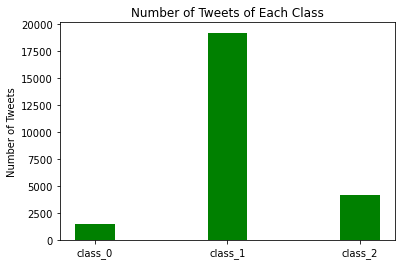

In [4]:
# plot the graph of number of tweets of each class

count_class = pd.DataFrame({'class_0': [np.sum(data_tweet['class'] == 0)], 'class_1': [np.sum(data_tweet['class'] == 1)],\
     'class_2': [np.sum(data_tweet['class'] == 2)]})

x, y = count_class.columns, count_class.iloc[0]
plt.bar(x, y, width = 0.3, color = 'green')
plt.title('Number of Tweets of Each Class')
plt.ylabel('Number of Tweets')
plt.show()

In [5]:
# number of words

df1 = pd.DataFrame()

df1['number_of_words'] = data_tweet['tweet'].apply(lambda x: len(str(x).split(" ")))
df2 = pd.concat([data_tweet['tweet'], data_tweet['class'], df1], axis = 1)

# number of characters

df2['number_of_characters'] = data_tweet['tweet'].str.len()
df2

,tweet,class,number_of_words,number_of_characters
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,26,137
...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,19,146
24779,"you've gone and broke the wrong heart baby, an...",2,13,70
24780,young buck wanna eat!!.. dat nigguh like I ain...,1,13,67
24781,youu got wild bitches tellin you lies,1,7,37


In [6]:
# average word length

def avg_word_len(tweet):
    words = tweet.split()
    return (sum(len(word) for word in words)/len(words))

df2['average_word_length'] = data_tweet['tweet'].apply(lambda x: avg_word_len(x))
df2

,tweet,class,number_of_words,number_of_characters,average_word_length
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,25,140,4.640000
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,16,85,4.375000
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,21,120,4.761905
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,9,62,6.000000
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,26,137,4.307692
...,...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,19,146,6.736842
24779,"you've gone and broke the wrong heart baby, an...",2,13,70,4.461538
24780,young buck wanna eat!!.. dat nigguh like I ain...,1,13,67,4.230769
24781,youu got wild bitches tellin you lies,1,7,37,4.428571


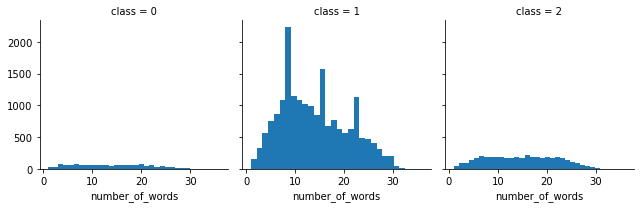

In [7]:
# visualize the number of words

graph1 = sns.FacetGrid(df2, col = 'class')
graph1.map(plt.hist, 'number_of_words', bins = 30)

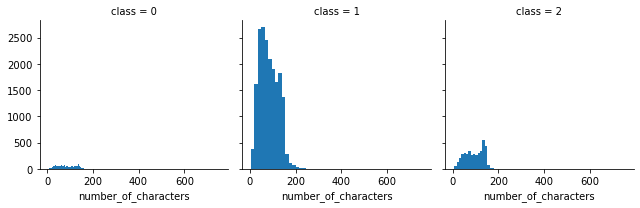

In [8]:
# visualize the number of characters

graph1 = sns.FacetGrid(df2, col = 'class')
graph1.map(plt.hist, 'number_of_characters', bins = 50)

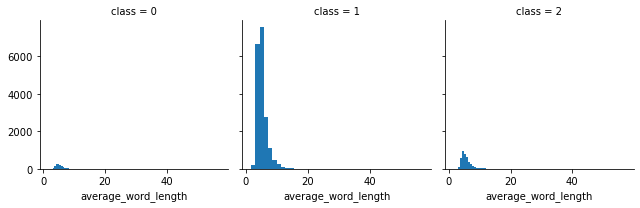

In [9]:
# visualize the average word length

graph2 = sns.FacetGrid(df2, col = 'class')
graph2.map(plt.hist, 'average_word_length', bins = 40)

In [10]:
# define a function to clean data and make it suitable for modelling

def clean_data(dataset):
    
    dataset = pd.Series(dataset)

    # make all words to lowercase, and remove redundant space

    data_tweet_str = dataset.apply(lambda x: ' '.join(x.lower().strip() for x in x.split()))

    # remove user names

    data_tweet_wo_user = data_tweet_str.apply(lambda x: " ".join(x for x in x.split() if x[0] != '@'))

    # remove all punctuations

    data_tweet_str_wo_punc = data_tweet_wo_user.str.replace('[^\w\s]','')

    # call the stopword list

    stop = stopwords.words('english')

    # self-define a stopword list 

    more_stopwords = ["english", "aint", "rt", 'shouldnt', 'ya', 'yea', 'another', 'yo', 'us', 'cant', 'im', 'yeah', \
                      'doesnt', 'tweets', 'tweet', 'lmao', 'Lmao', 'LMAO', 'u', 'lol', 'amp', 'thats', 'youre', \
                      'wont', 'would']

    # combine the two stopword lists together

    for i in range(len(more_stopwords)):
        stop.append(more_stopwords[i])

    # remove stopwords

    data_tweet_str_wo_punc_wo_stop = data_tweet_str_wo_punc.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # remove web address

    data_tweet_str_wo_punc_wo_stop_wo_http = data_tweet_str_wo_punc_wo_stop.apply(lambda x: " ".join(x for x in x.split() \
                                                                                                 if x[0:4] != 'http'))
    # remove numbers and words starting with numbers

    number = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

    data_tweet_str_wo_punc_wo_stop_wo_http_wo_no = data_tweet_str_wo_punc_wo_stop_wo_http\
                                                    .apply(lambda x: " ".join(x for x in x.split() \
                                                            if x[0] not in number))

    # lemmatization

    lemmatizer = WordNetLemmatizer() 

    dataset_clean = data_tweet_str_wo_punc_wo_stop_wo_http_wo_no \
                    .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    return (dataset_clean)

In [11]:
# combine clean tweets with original dataset

data_tweet['clean_tweets'] = clean_data(data_tweet['tweet'])
data_tweet[['tweet','clean_tweets']]

,tweet,clean_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house man always take ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad cuffin dat hoe place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthafin lie right tl trash mine bible sc...
24779,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like fuckin dis
24781,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


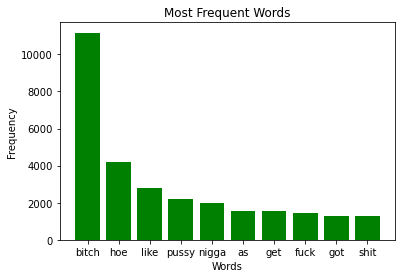

In [12]:
# most frequent words

freq = pd.Series(' '.join(data_tweet['clean_tweets']).split()).value_counts()[:10]
plt.bar(freq.index, freq, color = 'green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.show()

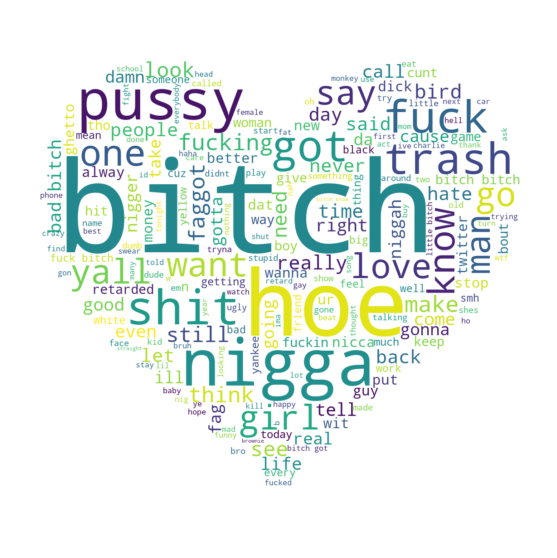

In [13]:
# visualize most frequent words in all tweets

mask = np.array(Image.open('/Users/ching/Desktop/Class/Data Project Management/AI and Big Data Project/Project/heart.png'))

all_words = ' '.join([text for text in data_tweet['clean_tweets'] ])
wordcloud = WordCloud(width = 800, height = 800, background_color = "white", mask = mask).generate(all_words)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [14]:
# overall tweet sentiment

overall_sentiment = TextBlob(str(data_tweet['clean_tweets'])).sentiment[0]
print("The overall sentiment of all tweets is: " + str(overall_sentiment), "1: positive", "-1: negative", sep = "\n")

The overall sentiment of all tweets is: -0.06493506493506492
1: positive
-1: negative


In [15]:
# convert the tweets into statistical numbers

vectorizer = TfidfVectorizer(ngram_range = (1, 4), max_features = 10000, use_idf = True)
tfidf = vectorizer.fit_transform(data_tweet['clean_tweets'])
tfidf

<24783x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 188100 stored elements in Compressed Sparse Row format>

In [16]:
# data split

X = tfidf
y = data_tweet['class'].astype(int)
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
# Logistic Regression 

model_lr = LogisticRegression(C = 2, max_iter = 500).fit(x_train_tfidf, y_train)
y_pred_lr = model_lr.predict(x_test_tfidf)
report_lr = classification_report(y_test, y_pred_lr)

print(report_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
label_lr = "Logistic Regression"
print(label_lr)
print('Accuracy: ', acc_lr)

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       427
           1       0.92      0.96      0.94      5747
           2       0.84      0.83      0.84      1261

    accuracy                           0.90      7435
   macro avg       0.77      0.66      0.69      7435
weighted avg       0.88      0.90      0.88      7435

Logistic Regression
Accuracy:  0.8965702757229321


In [18]:
# Decision Tree

model_dt = tree.DecisionTreeClassifier().fit(x_train_tfidf, y_train)
y_pred = model_dt.predict(x_test_tfidf)
report_dt = classification_report(y_test, y_pred)

print(report_dt)
acc_dt = accuracy_score(y_test, y_pred)
label_dt = 'Decision Tree'
print(label_dt)
print('Accuracy: ', acc_dt)

              precision    recall  f1-score   support

           0       0.32      0.27      0.29       427
           1       0.91      0.93      0.92      5747
           2       0.82      0.78      0.80      1261

    accuracy                           0.87      7435
   macro avg       0.69      0.66      0.67      7435
weighted avg       0.86      0.87      0.86      7435

Decision Tree
Accuracy:  0.8683254875588433


In [19]:
# kNN

model_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p = 1).fit(x_train_tfidf, y_train)
y_pred = model_knn.predict(x_test_tfidf)
report_knn = classification_report(y_test, y_pred)

print(report_knn)
acc_knn = accuracy_score(y_test, y_pred)
label_knn = 'K-nearest Neighbors'
print(label_knn)
print('Accuracy: ', acc_knn)

              precision    recall  f1-score   support

           0       0.40      0.18      0.24       427
           1       0.81      0.97      0.88      5747
           2       0.74      0.24      0.36      1261

    accuracy                           0.80      7435
   macro avg       0.65      0.46      0.50      7435
weighted avg       0.78      0.80      0.76      7435

K-nearest Neighbors
Accuracy:  0.7966375252185609


In [20]:
# Random Forest

model_rf = RandomForestClassifier(n_estimators = 200).fit(x_train_tfidf, y_train)
y_pred = model_rf.predict(x_test_tfidf)
report_rf = classification_report(y_test, y_pred)

print(report_rf)
acc_rf = accuracy_score(y_test, y_pred)
label_rf = 'Random Forest'
print(label_rf)
print('Accuracy: ', acc_rf)

              precision    recall  f1-score   support

           0       0.52      0.14      0.22       427
           1       0.91      0.96      0.94      5747
           2       0.85      0.84      0.84      1261

    accuracy                           0.90      7435
   macro avg       0.76      0.65      0.67      7435
weighted avg       0.88      0.90      0.88      7435

Random Forest
Accuracy:  0.8950907868190988


In [21]:
# SVM

model_svm = LinearSVC().fit(x_train_tfidf, y_train)
y_pred = model_svm.predict(x_test_tfidf)
report_svm = classification_report(y_test, y_pred)

print(report_svm)
acc_svm = accuracy_score(y_test, y_pred)
label_svm = 'SVM'
print(label_svm)
print('Accuracy: ', acc_svm)

              precision    recall  f1-score   support

           0       0.45      0.22      0.30       427
           1       0.92      0.95      0.93      5747
           2       0.81      0.81      0.81      1261

    accuracy                           0.89      7435
   macro avg       0.73      0.66      0.68      7435
weighted avg       0.87      0.89      0.88      7435

SVM
Accuracy:  0.8852723604572966


In [22]:
# Naive Bayes

x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state = 42, test_size = 0.3)
model_nb = GaussianNB().fit(x_train_tfidf, y_train)
y_pred = model_nb.predict(x_test_tfidf)
report_nb = classification_report(y_test, y_pred)

print(report_nb)
acc_nb = accuracy_score(y_test, y_pred)
label_nb = 'Naive Bayes'
print(label_nb)
print('Accuracy: ', acc_nb)

              precision    recall  f1-score   support

           0       0.11      0.32      0.16       427
           1       0.88      0.75      0.81      5747
           2       0.54      0.55      0.55      1261

    accuracy                           0.69      7435
   macro avg       0.51      0.54      0.50      7435
weighted avg       0.78      0.69      0.73      7435

Naive Bayes
Accuracy:  0.6890383322125084


In [23]:
# summary of modelling results

d0 = pd.DataFrame([label_lr, label_dt, label_knn, label_rf, label_svm, label_nb])
d1 = pd.DataFrame([acc_lr, acc_dt, acc_knn, acc_rf, acc_svm, acc_nb])
d2 = pd.concat([d0, d1], axis = 1)
d2.columns = ['Model', 'Accuracy']
d2 = d2.sort_values(by = ['Accuracy'], ascending = False)

display(d2)
print('The best model is', d2.iloc[0, 0])

,Model,Accuracy
0,Logistic Regression,0.896570
3,Random Forest,0.895091
4,SVM,0.885272
1,Decision Tree,0.868325
2,K-nearest Neighbors,0.796638
5,Naive Bayes,0.689038


The best model is Logistic Regression


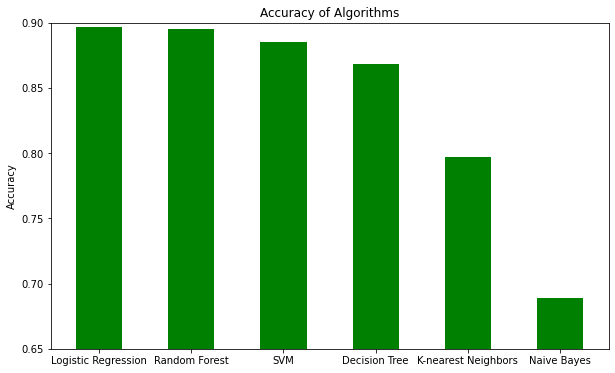

In [24]:
# plot the graph of accuracy of algorithms

plt.figure(figsize = (10, 6))
plt.bar(d2['Model'], d2['Accuracy'], width = 0.5, color = 'green')
plt.title('Accuracy of Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.65, 0.9)
plt.show()

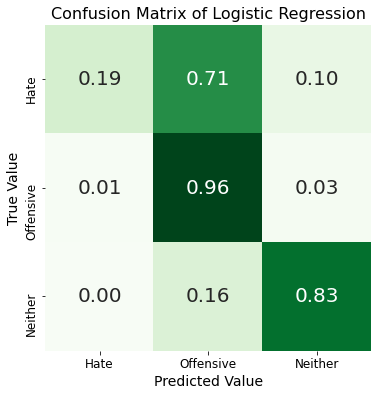

In [25]:
# visualize the confusion matrix of the most accurate algorithm, 

confusion_matrix_final = confusion_matrix(y_test, y_pred_lr)
matrix_proportions = np.zeros((3, 3))
for i in range(0,3):
    matrix_proportions[i, :] = confusion_matrix_final[i, :] / float(confusion_matrix_final[i, :].sum())
names = ['Hate', 'Offensive', 'Neither']
confusion_df = pd.DataFrame(matrix_proportions, index = names, columns = names)
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_df, annot = True, annot_kws = {"size": 20}, cmap = 'Greens', cbar = False, square = True,fmt = '.2f')
plt.title('Confusion Matrix of Logistic Regression', fontsize = 16)
plt.ylabel(r'True Value', fontsize = 14)
plt.xlabel(r'Predicted Value', fontsize = 14)
plt.tick_params(labelsize = 12)